In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import torch

plt.style.use(["seaborn-v0_8-paper", "seaborn-v0_8-ticks", "seaborn-v0_8-whitegrid"])
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.which"] = "both"
plt.rcParams["grid.linestyle"] = "--"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["figure.autolayout"] = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.frameon"] = True
plt.rcParams["legend.loc"] = "best"
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False

# YOLOv8N
---


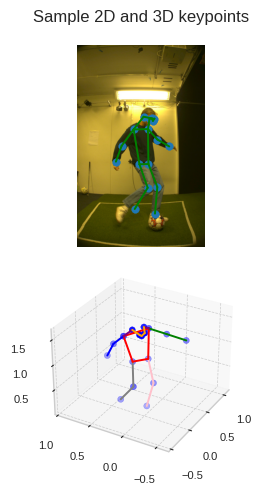

In [14]:
# Soccer

# Get sample
activity = "soccer"
ds = SportsPoseDataset(
    data_dir="../dataset/sportspose",
    sample_level="video",
    whitelist = {"metadata": {"activity": activity}},
    sample_method = sample_fn
)
sample = next(iter(ds))
frame = sample["video"]["image"]["right"][0]
joints2D = sample["joints_2d"]["right"][0]
joints3D = sample["joints_3d"]["data_points"][0]


fig = plt.figure(figsize=(10, 5))
ax2d = fig.add_subplot(2, 1, 1)
ax3d = fig.add_subplot(2, 1, 2, projection='3d')

ax2d.imshow(frame)
ax2d.scatter(joints2D[:, 0], joints2D[:, 1])
for idx, tree in enumerate(SPORTSPOSE_KINEMATIC_TREE):
    coordinates = np.zeros((2, 2))
    coordinates[:, 0] = joints2D[tree[0]]
    coordinates[:, 1] = joints2D[tree[1]]
    ax2d.plot(coordinates[0], coordinates[1], c='green')
ax2d.set_axis_off()
plot_skeleton_3d(joints3D, ax=ax3d)

plt.grid(False)
plt.suptitle("Sample 2D and 3D keypoints")
plt.savefig("../plots_new/ds_sample.png", dpi=300, bbox_inches='tight')
plt.show()



# def plot_2d_skeleton(gt, act, yolo):
#     fig, ax = plt.subplots()
#     ax.imshow(frame)
#     ax.scatter(gt[:, 0], gt[:, 1], marker='o', c='green', s = 30, label='Ground Truth')
#     ax.scatter(preds.xy[0][:, 0], preds.xy[0][:, 1], marker='x', c='red', s = 30, label='YOLOv8-N Prediction')
#
#     for idx, tree in enumerate(SPORTSPOSE_KINEMATIC_TREE):
#         coordinates = np.zeros((2, 2))
#         coordinates[:, 0] = joints2D[tree[0]]
#         coordinates[:, 1] = joints2D[tree[1]]
#         ax.plot(coordinates[0], coordinates[1], c='green', linewidth=3)
#
#     ax.set_axis_off()
#     plt.title(f"YOLOv8{yolo.upper()}: 2D Pose Estimation {act.capitalize()}")
#     plt.savefig(f"../plots_new/ds_sample}: 2D Pose Estimation {act.capitalize()}", bbox_inches='tight')
#     plt.show()
#     plt.close(fig)


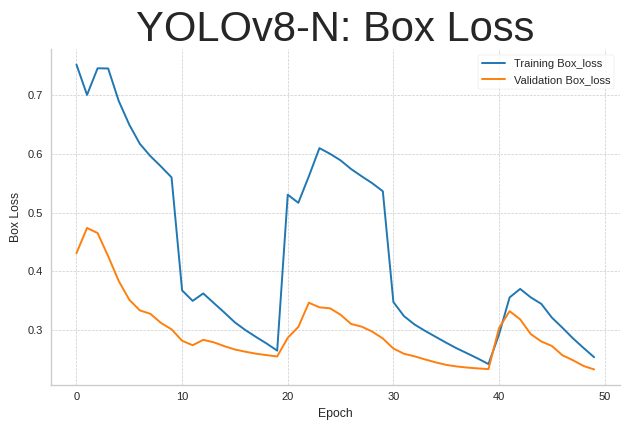

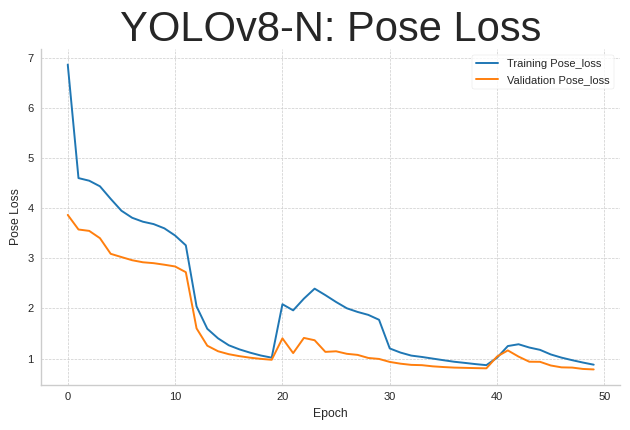

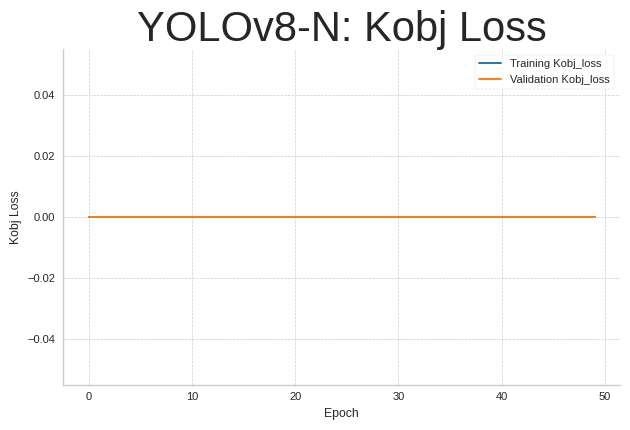

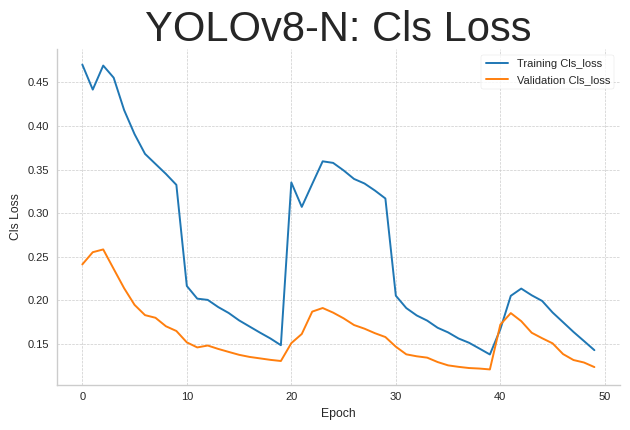

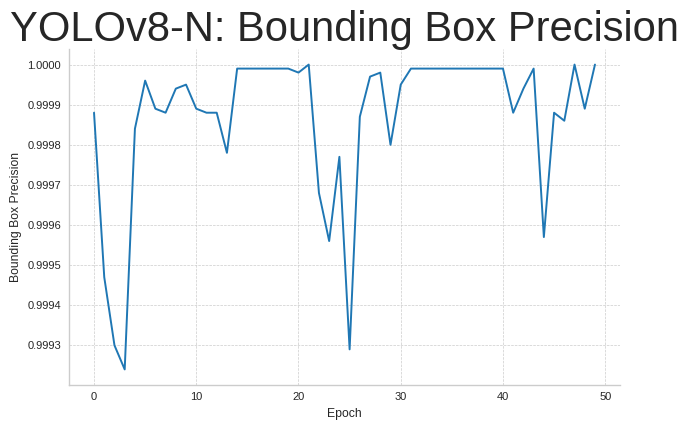

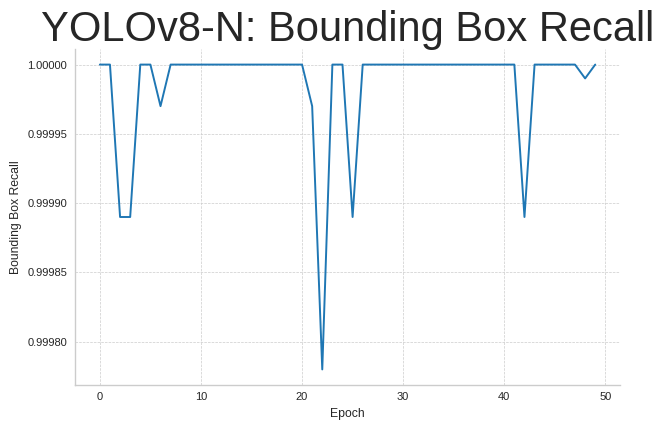

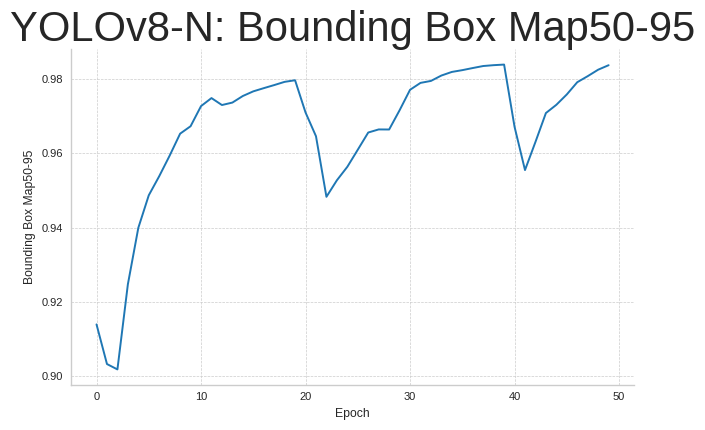

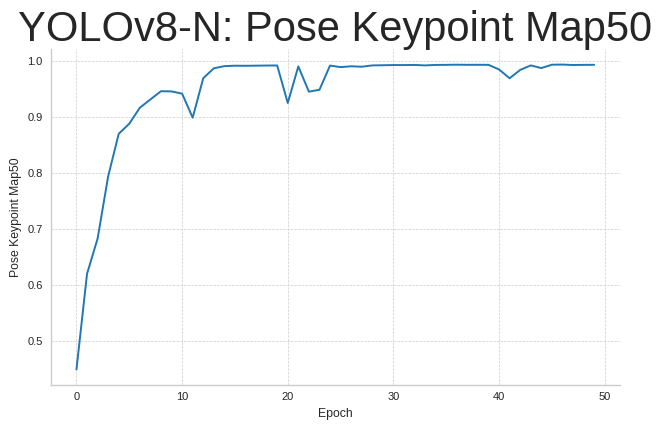

In [2]:
results = sorted(glob.glob("../results/yolov8n/**/*/results.csv", recursive = True), reverse = True)

combined = []

for i, res in enumerate(results):
    run_id = res.split("/")[-2]
    epoch_modifier = int(run_id.split("(")[-1][0:2]) if "epoch" in run_id else 0
    df_ = pd.read_csv(res)
    df_.columns = map(lambda x: x.strip(), df_.columns)
    df_['epoch'] = df_['epoch'] + epoch_modifier
    combined.append(df_)

combined = pd.concat(combined).sort_values(['epoch'])
x = combined['epoch'].values

# Loss plots
losses = ['box_loss', 'pose_loss', 'kobj_loss', 'cls_loss', 'dfl_loss']
for loss in losses:
    train_loss = combined[f'train/{loss}'].values
    valid_loss = combined[f'val/{loss}'].values

    fig, ax = plt.subplots()
    ax.plot(x, train_loss, label=f"Training {loss.capitalize()}")
    ax.plot(x, valid_loss, label=f"Validation {loss.capitalize()}")
    ax.set_xlabel("Epoch")
    ax.set_ylabel(" ".join(map(lambda x: x.capitalize(), loss.split("_"))))

    title = "YOLOv8-N: "
    title += " ".join(map(lambda x: x.capitalize(), loss.split("_")))

    plt.legend()
    plt.title(title,fontsize= 30)
    plt.savefig(f"../plots_new/yolov8n/LOSS {title.split(': ')[1]}", dpi=100)


# Metrics Plots
metrics = [
    "metrics/precision(B)", "metrics/recall(B)",
    "metrics/mAP50(B)", "metrics/mAP50-95(B)",
    "metrics/precision(P)", "metrics/recall(P)",
    "metrics/mAP50(P)", "metrics/mAP50-95(P)"
]
for metric in metrics:
    y = combined[metric].values
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel("Epoch")
    ax.set_ylabel(f"Bounding Box {metric.split('/')[-1][:-3].capitalize()}" if "(B)" in metric else f"Pose Keypoint {metric.split('/')[-1][:-3].capitalize()}")

    title = "YOLOv8-N: "
    title += f"Bounding Box {metric.split('/')[-1][:-3].capitalize()}" if "(B)" in metric else f"Pose Keypoint {metric.split('/')[-1][:-3].capitalize()}"
    plt.title(title,fontsize= 30)

    plt.savefig(f"../plots_new/yolov8n/METRIC {title.split(': ')[1]}", dpi=100)
    plt.show()

# YOLOv8X
---


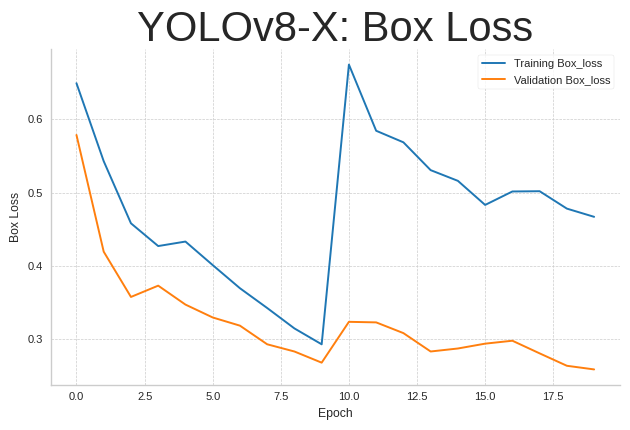

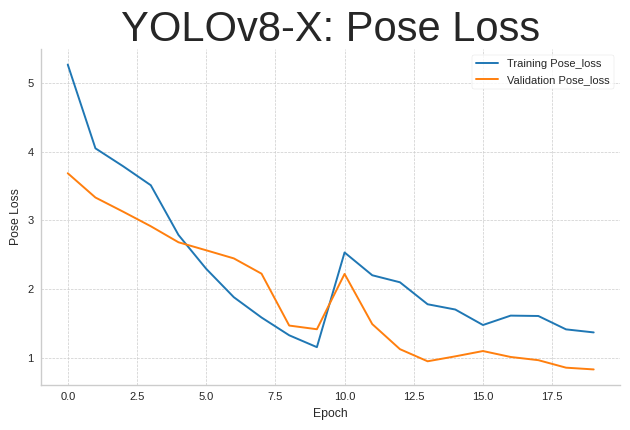

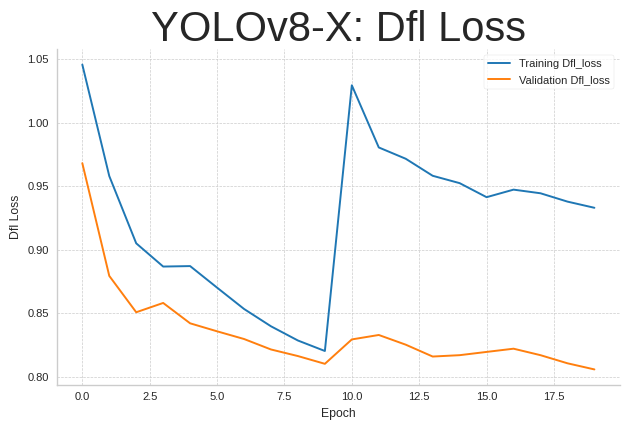

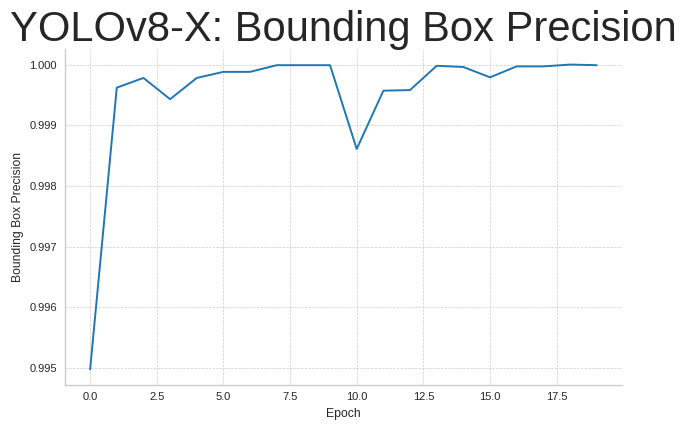

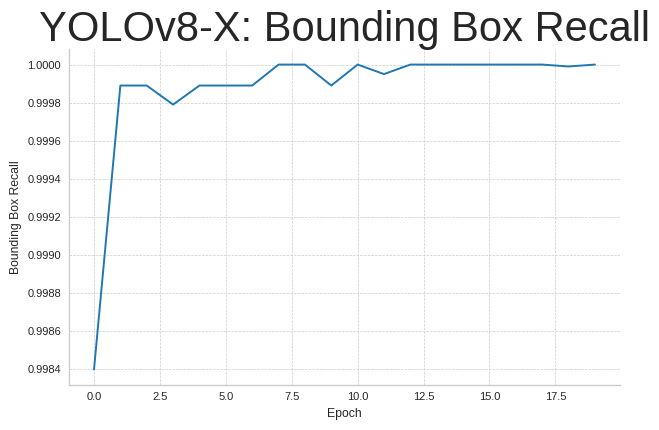

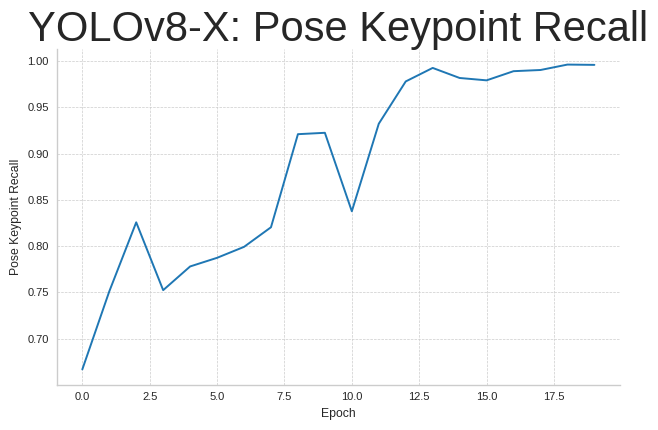

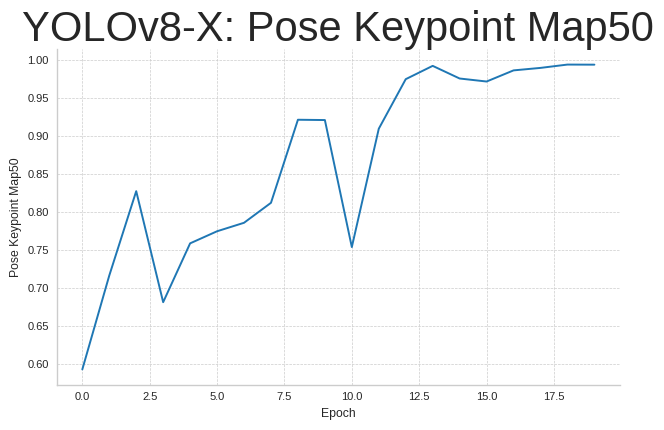

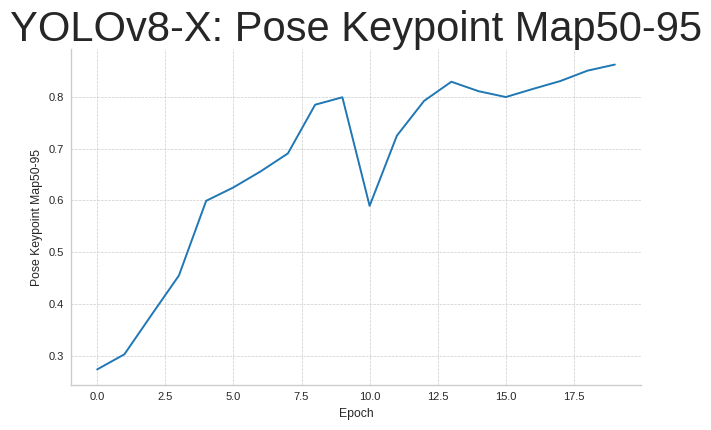

In [3]:
results = sorted(glob.glob("../results/yolov8x/**/*/results.csv", recursive = True), reverse = True)

combined = []

for i, res in enumerate(results):
    run_id = res.split("/")[-2]
    epoch_modifier = int(run_id.split("(")[-1][0:2]) if ("epoch" in run_id) and ("(0" not in run_id) else 0
    df_ = pd.read_csv(res)
    df_.columns = map(lambda x: x.strip(), df_.columns)
    df_['epoch'] = df_['epoch'] + epoch_modifier
    combined.append(df_)

combined = pd.concat(combined).sort_values(['epoch'])
combined = combined.drop_duplicates().reset_index(drop=True)
x = combined['epoch'].values

# Loss plots
losses = ['box_loss', 'pose_loss', 'kobj_loss', 'cls_loss', 'dfl_loss']
for loss in losses:
    train_loss = combined[f'train/{loss}'].values
    valid_loss = combined[f'val/{loss}'].values

    fig, ax = plt.subplots()
    ax.plot(x, train_loss, label=f"Training {loss.capitalize()}")
    ax.plot(x, valid_loss, label=f"Validation {loss.capitalize()}")
    ax.set_xlabel("Epoch")
    ax.set_ylabel(" ".join(map(lambda x: x.capitalize(), loss.split("_"))))

    title = "YOLOv8-X: "
    title += " ".join(map(lambda x: x.capitalize(), loss.split("_")))

    plt.legend()
    plt.title(title,fontsize= 30)
    plt.savefig(f"../plots_new/yolov8x/LOSS {title.split(': ')[1]}", dpi=100)


# Metrics Plots
metrics = [
    "metrics/precision(B)", "metrics/recall(B)",
    "metrics/mAP50(B)", "metrics/mAP50-95(B)",
    "metrics/precision(P)", "metrics/recall(P)",
    "metrics/mAP50(P)", "metrics/mAP50-95(P)"
]
for metric in metrics:
    y = combined[metric].values
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel("Epoch")
    ax.set_ylabel(f"Bounding Box {metric.split('/')[-1][:-3].capitalize()}" if "(B)" in metric else f"Pose Keypoint {metric.split('/')[-1][:-3].capitalize()}")

    title = "YOLOv8-X: "
    title += f"Bounding Box {metric.split('/')[-1][:-3].capitalize()}" if "(B)" in metric else f"Pose Keypoint {metric.split('/')[-1][:-3].capitalize()}"
    plt.title(title,fontsize= 30)

    plt.savefig(f"../plots_new/yolov8x/METRIC {title.split(': ')[1]}", dpi=100)
    plt.show()


# Pose Lifting
---

In [4]:
from tensorboard.backend.event_processing import event_accumulator

cnn_ea = event_accumulator.EventAccumulator("../results/lifting/runs/Aug16_22-35-22_3431b544db8fCNN/events.out.tfevents.1692225322.3431b544db8f.23.0")
ffn_ea = event_accumulator.EventAccumulator("../results/lifting/runs/Aug17_03-41-08_3431b544db8fFFN/events.out.tfevents.1692243668.3431b544db8f.23.1")


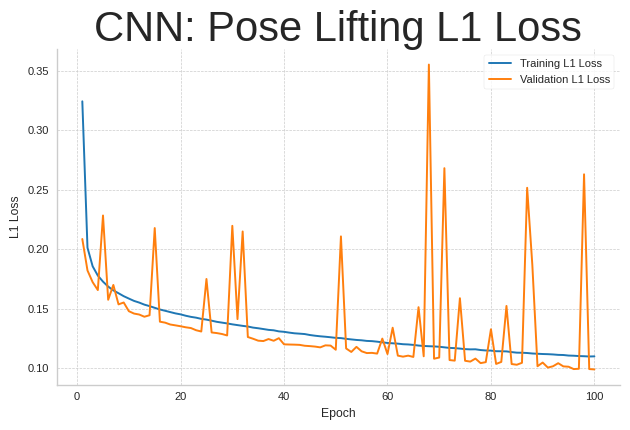

In [5]:
# CNN
cnn_ea.Reload()
train_loss = pd.DataFrame(cnn_ea.Scalars('epoch_loss/train'))
valid_loss = pd.DataFrame(cnn_ea.Scalars('epoch_loss/val'))

x = train_loss['step'].values
fig, ax = plt.subplots()
ax.plot(x, train_loss['value'].values, label="Training L1 Loss")
ax.plot(x, valid_loss['value'].values, label="Validation L1 Loss")

ax.set_ylabel("L1 Loss")
ax.set_xlabel("Epoch")
plt.title("CNN: Pose Lifting L1 Loss",fontsize= 30)

plt.legend()
plt.savefig("../plots_new/lifting/CNN: L1 Loss.png", dpi=100)
plt.show()


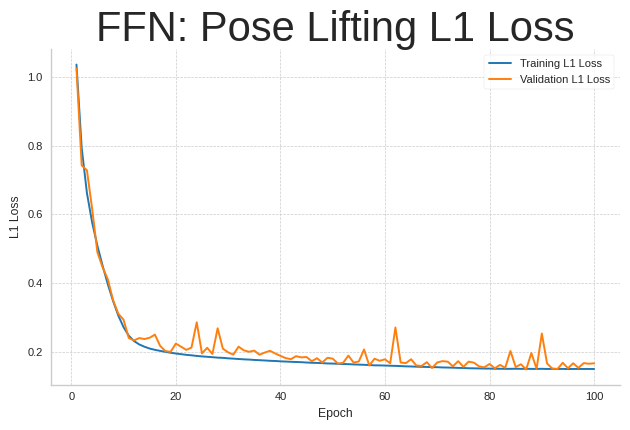

In [6]:
# FFN
ffn_ea.Reload()
train_loss = pd.DataFrame(ffn_ea.Scalars('epoch_loss/train'))
valid_loss = pd.DataFrame(ffn_ea.Scalars('epoch_loss/val'))

x = train_loss['step'].values
fig, ax = plt.subplots()
ax.plot(x, train_loss['value'].values, label="Training L1 Loss")
ax.plot(x, valid_loss['value'].values, label="Validation L1 Loss")

ax.set_ylabel("L1 Loss")
ax.set_xlabel("Epoch")
plt.title("FFN: Pose Lifting L1 Loss",fontsize= 30)

plt.legend()
plt.savefig("../plots_new/lifting/FFN: L1 Loss.png", dpi=100)
plt.show()


# YOLOv8-N 2D HPE
---

In [7]:
import os
from ultralytics import YOLO
from sportspose.dataset import SportsPoseDataset
from sportspose.plot_skeleton_3d import SPORTSPOSE_KINEMATIC_TREE, plot_skeleton_3d
from src.poselift.cnn import CNNModel, ResidualBlock
from src.poselift.ffn import FFNModel
import torch

# Sampling Method
def sample_fn(measurements, index):
    max_val = len(measurements)
    choices = range(150, max_val)
    # Uniform random sample
    choice = np.random.choice(choices)
    # Return the frame index
    return measurements[choice]

# Load models
yolov8n = YOLO("../results/yolov8n/runs/pose/YOLOv8N SGD (40-50 epochs)/weights/best.pt")
yolov8x = YOLO("../results/yolov8x/version6/runs/pose/YOLOv8X SGD (15-20 epochs)/weights/best.pt")
cnn = torch.load(os.path.join("../results", "lifting", "cnn", "best.pt"), map_location = torch.device('cpu'))
ffn = torch.load(os.path.join("../results", "lifting", "ffn", "best.pt"), map_location =torch.device('cpu'))

# 2D Plotting Function
def plot_2d_skeleton(gt, preds, act, yolo):
    fig, ax = plt.subplots()
    ax.imshow(frame)
    ax.scatter(gt[:, 0], gt[:, 1], marker='o', c='green', s = 30, label='Ground Truth')
    ax.scatter(preds.xy[0][:, 0], preds.xy[0][:, 1], marker='x', c='red', s = 30, label='YOLOv8-N Prediction')

    for idx, tree in enumerate(SPORTSPOSE_KINEMATIC_TREE):
        coordinates = np.zeros((2, 2))
        coordinates[:, 0] = joints2D[tree[0]]
        coordinates[:, 1] = joints2D[tree[1]]
        ax.plot(coordinates[0], coordinates[1], c='green', linewidth=3)

    for idx, tree in enumerate(SPORTSPOSE_KINEMATIC_TREE):
        coordinates = np.zeros((2, 2))
        coordinates[:, 0] = result2D.xy[0][tree[0]]
        coordinates[:, 1] = result2D.xy[0][tree[1]]
        ax.plot(coordinates[0], coordinates[1], c='red')

    ax.set_axis_off()
    plt.title(f"YOLOv8{yolo.upper()}: 2D Pose Estimation {act.capitalize()}",fontsize= 30)
    plt.savefig(f"../plots_new/yolov8{yolo}/YOLOv8{yolo.upper()}: 2D Pose Estimation {act.capitalize()}", bbox_inches='tight')
    plt.show()
    plt.close(fig)

# 3D plotting function
def plot_3d_skeleton(gt, preds, act, lift_, yolo):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')

    plot_skeleton_3d(gt, ax = ax, kt_color = "green", joint_color = "green", label = "Ground Truth", marker = 'o')
    plot_skeleton_3d(preds, ax = ax, kt_color = "red", joint_color = "red", label = f"{lift_.upper()} Prediction", marker = 'x')
    ax.legend()

    plt.title(f"{lift_.upper()} + YOLOv8{yolo.upper()}: 3D Pose Lifting {act.capitalize()}",fontsize= 30)
    plt.savefig(f"../plots_new/lifting/{lift_.upper()} + YOLOv8{yolo.upper()}: 3D Pose Lifting {act.capitalize()}", bbox_inches='tight')
    plt.show()
    plt.close(fig)




0: 640x416 1 person, 100.1ms
Speed: 4.2ms preprocess, 100.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 416)


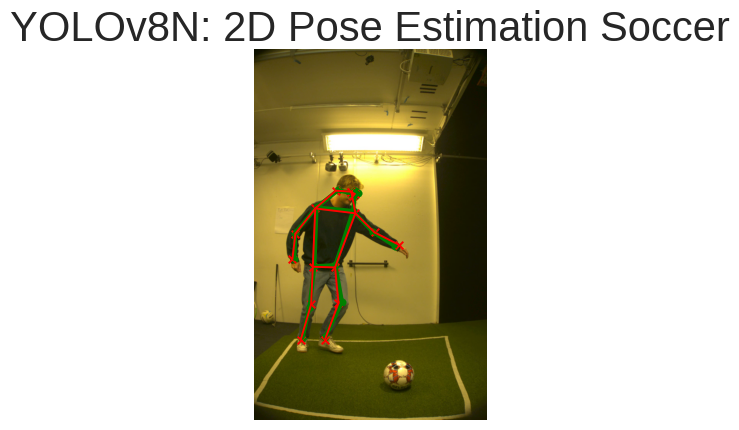

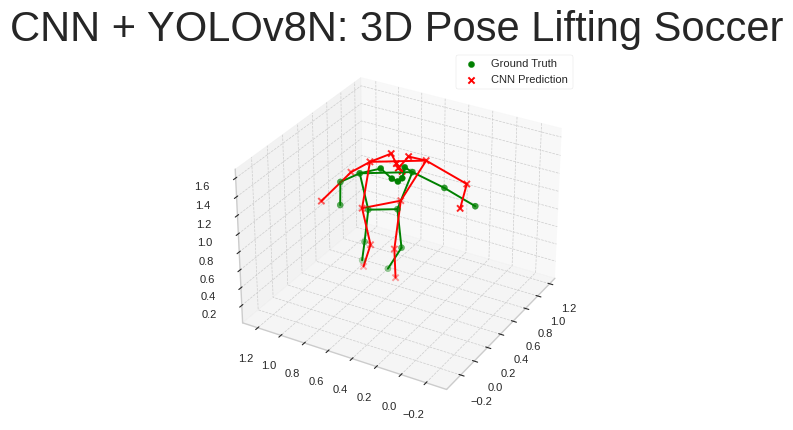

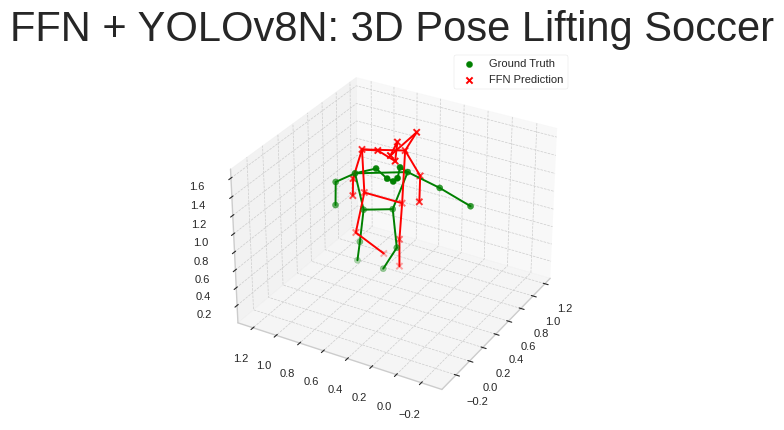


0: 640x416 1 person, 1216.4ms
Speed: 2.3ms preprocess, 1216.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 416)


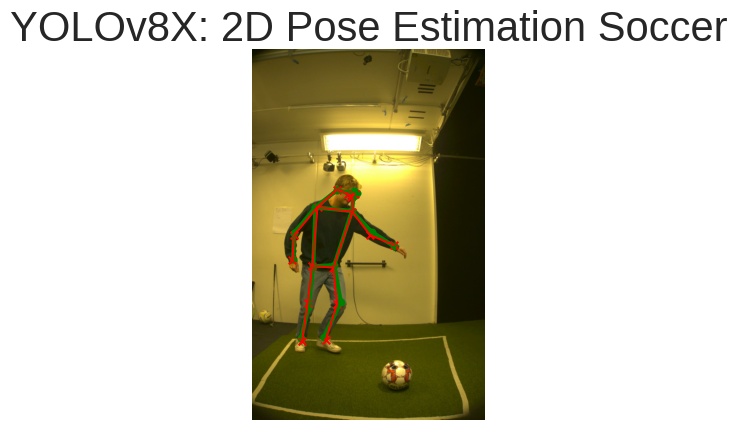

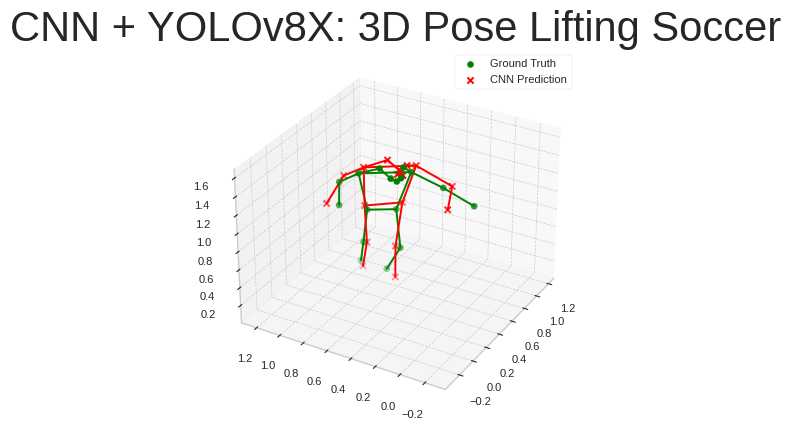

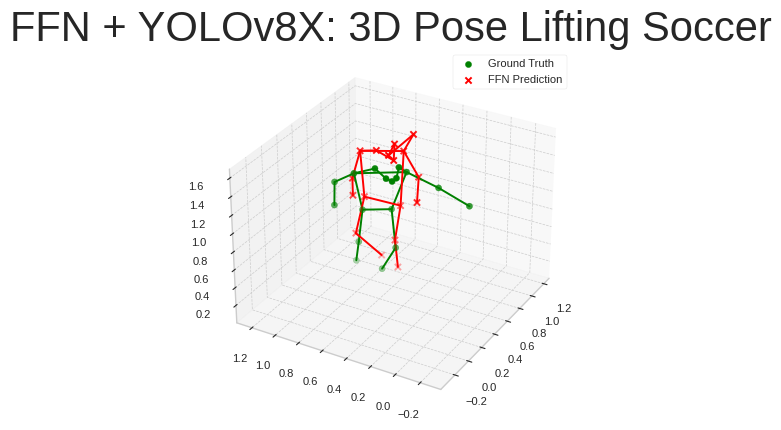

In [8]:
# Soccer

# Get sample
activity = "soccer"
ds = SportsPoseDataset(
    data_dir="../dataset/sportspose",
    sample_level="video",
    whitelist = {"metadata": {"activity": activity}},
    sample_method = sample_fn
)
sample = next(iter(ds))
frame = sample["video"]["image"]["right"][0]
joints2D = sample["joints_2d"]["right"][0]
joints3D = sample["joints_3d"]["data_points"][0]

# yoloV8n + cnn
with torch.no_grad():
    result2D = yolov8n(frame.copy())[0].keypoints
    result3D_cnn = cnn(result2D.xyn.clone()).detach().numpy()[0]
    result3D_ffn = ffn(result2D.xyn.clone()).detach().numpy()[0].reshape((17, 3))
plot_2d_skeleton(joints2D.copy(), result2D, activity, "n")
plot_3d_skeleton(joints3D.copy(), result3D_cnn, activity, "cnn", "n")
plot_3d_skeleton(joints3D.copy(), result3D_ffn, activity, "ffn", "n")

with torch.no_grad():
    result2D = yolov8x(frame.copy())[0].keypoints
    result3D_cnn = cnn(result2D.xyn.clone()).detach().numpy()[0]
    result3D_ffn = ffn(result2D.xyn.clone()).detach().numpy()[0].reshape((17, 3))
plot_2d_skeleton(joints2D.copy(), result2D, activity, "x")
plot_3d_skeleton(joints3D.copy(), result3D_cnn, activity, "cnn", "x")
plot_3d_skeleton(joints3D.copy(), result3D_ffn, activity, "ffn", "x")



0: 640x416 1 person, 44.4ms
Speed: 9.2ms preprocess, 44.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 416)


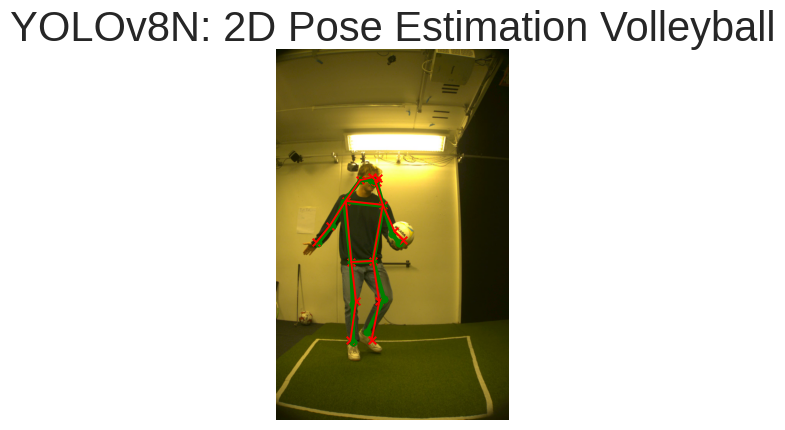

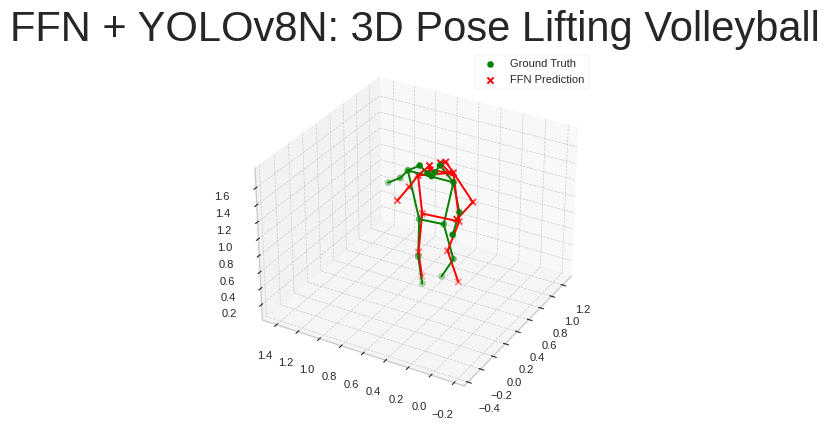


0: 640x416 1 person, 1009.0ms
Speed: 2.7ms preprocess, 1009.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


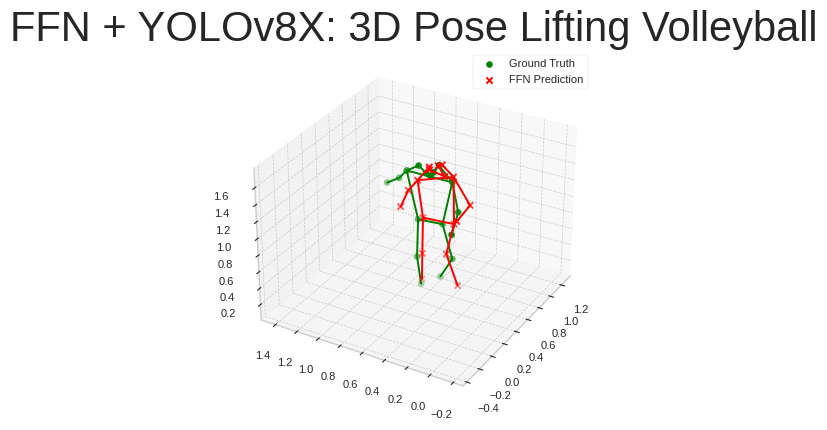

In [10]:
# Volleyball

# Get sample
activity = "volleyball"
ds = SportsPoseDataset(
    data_dir="../dataset/sportspose",
    sample_level="video",
    whitelist = {"metadata": {"activity": activity}},
    sample_method = sample_fn
)
sample = next(iter(ds))
frame = sample["video"]["image"]["right"][0]
joints2D = sample["joints_2d"]["right"][0]
joints3D = sample["joints_3d"]["data_points"][0]

# yoloV8n + cnn
with torch.no_grad():
    result2D = yolov8n(frame.copy())[0].keypoints
    result3D_cnn = cnn(result2D.xyn.clone()).detach().numpy()[0]
    result3D_ffn = ffn(result2D.xyn.clone()).detach().numpy()[0].reshape((17, 3))
plot_2d_skeleton(joints2D.copy(), result2D, activity, "n")
plot_3d_skeleton(joints3D.copy(), result3D_cnn, activity, "cnn", "n")
plot_3d_skeleton(joints3D.copy(), result3D_ffn, activity, "ffn", "n")

with torch.no_grad():
    result2D = yolov8x(frame.copy())[0].keypoints
    result3D_cnn = cnn(result2D.xyn.clone()).detach().numpy()[0]
    result3D_ffn = ffn(result2D.xyn.clone()).detach().numpy()[0].reshape((17, 3))
plot_2d_skeleton(joints2D.copy(), result2D, activity, "x")
plot_3d_skeleton(joints3D.copy(), result3D_cnn, activity, "cnn", "x")
plot_3d_skeleton(joints3D.copy(), result3D_ffn, activity, "ffn", "x")



0: 640x416 1 person, 78.9ms
Speed: 3.7ms preprocess, 78.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 416)


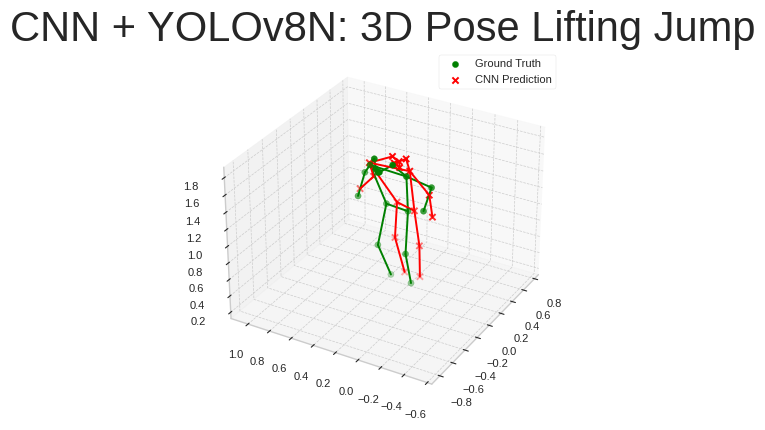


0: 640x416 1 person, 970.7ms
Speed: 2.7ms preprocess, 970.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


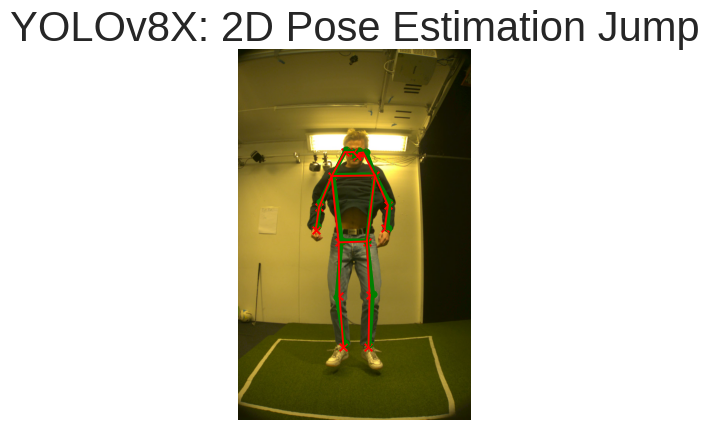

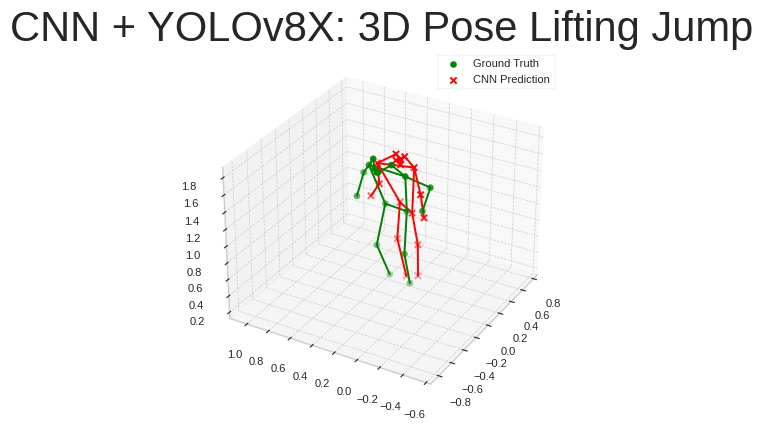

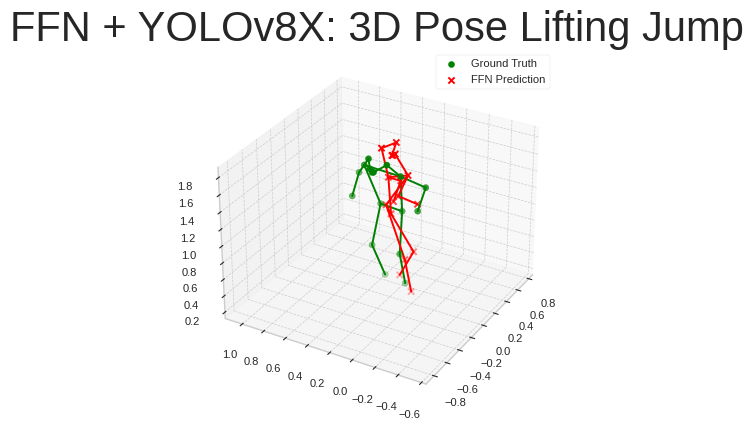

In [14]:
# Jump

# Get sample
activity = "jump"
ds = SportsPoseDataset(
    data_dir="../dataset/sportspose",
    sample_level="video",
    whitelist = {"metadata": {"activity": activity}},
    sample_method = sample_fn
)
sample = next(iter(ds))
frame = sample["video"]["image"]["right"][0]
joints2D = sample["joints_2d"]["right"][0]
joints3D = sample["joints_3d"]["data_points"][0]

# yoloV8n + cnn
with torch.no_grad():
    result2D = yolov8n(frame.copy())[0].keypoints
    result3D_cnn = cnn(result2D.xyn.clone()).detach().numpy()[0]
    result3D_ffn = ffn(result2D.xyn.clone()).detach().numpy()[0].reshape((17, 3))
plot_2d_skeleton(joints2D.copy(), result2D, activity, "n")
plot_3d_skeleton(joints3D.copy(), result3D_cnn, activity, "cnn", "n")
plot_3d_skeleton(joints3D.copy(), result3D_ffn, activity, "ffn", "n")

with torch.no_grad():
    result2D = yolov8x(frame.copy())[0].keypoints
    result3D_cnn = cnn(result2D.xyn.clone()).detach().numpy()[0]
    result3D_ffn = ffn(result2D.xyn.clone()).detach().numpy()[0].reshape((17, 3))
plot_2d_skeleton(joints2D.copy(), result2D, activity, "x")
plot_3d_skeleton(joints3D.copy(), result3D_cnn, activity, "cnn", "x")
plot_3d_skeleton(joints3D.copy(), result3D_ffn, activity, "ffn", "x")



0: 640x416 1 person, 31.9ms
Speed: 1.5ms preprocess, 31.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 416)



0: 640x416 1 person, 1461.7ms
Speed: 8.3ms preprocess, 1461.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 416)


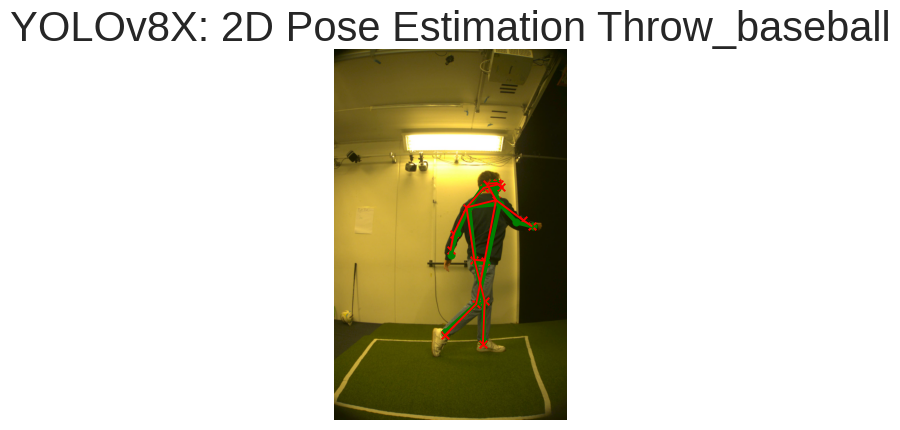

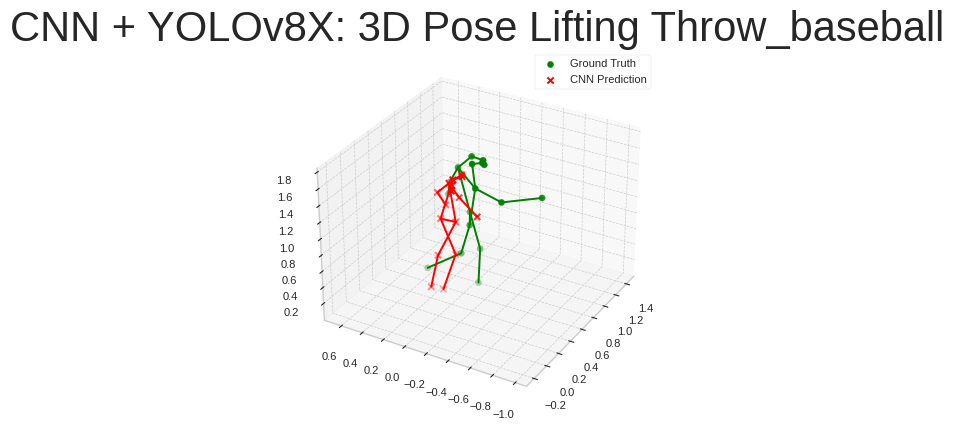

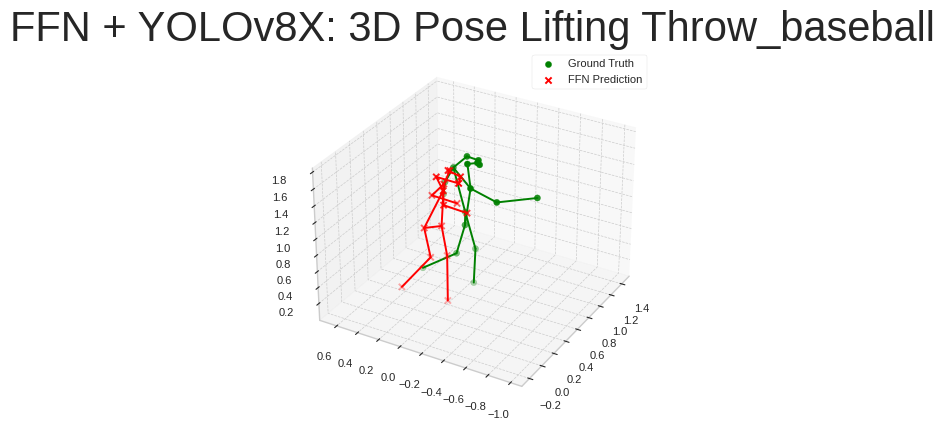

In [18]:
# Baseball

# Get sample
activity = "throw_baseball"
ds = SportsPoseDataset(
    data_dir="../dataset/sportspose",
    sample_level="video",
    whitelist = {"metadata": {"activity": activity}},
    sample_method = sample_fn
)
sample = next(iter(ds))
frame = sample["video"]["image"]["right"][0]
joints2D = sample["joints_2d"]["right"][0]
joints3D = sample["joints_3d"]["data_points"][0]

# yoloV8n + cnn
with torch.no_grad():
    result2D = yolov8n(frame.copy())[0].keypoints
    result3D_cnn = cnn(result2D.xyn.clone()).detach().numpy()[0]
    result3D_ffn = ffn(result2D.xyn.clone()).detach().numpy()[0].reshape((17, 3))
plot_2d_skeleton(joints2D.copy(), result2D, activity, "n")
plot_3d_skeleton(joints3D.copy(), result3D_cnn, activity, "cnn", "n")
plot_3d_skeleton(joints3D.copy(), result3D_ffn, activity, "ffn", "n")

with torch.no_grad():
    result2D = yolov8x(frame.copy())[0].keypoints
    result3D_cnn = cnn(result2D.xyn.clone()).detach().numpy()[0]
    result3D_ffn = ffn(result2D.xyn.clone()).detach().numpy()[0].reshape((17, 3))
plot_2d_skeleton(joints2D.copy(), result2D, activity, "x")
plot_3d_skeleton(joints3D.copy(), result3D_cnn, activity, "cnn", "x")
plot_3d_skeleton(joints3D.copy(), result3D_ffn, activity, "ffn", "x")



0: 640x416 1 person, 47.8ms
Speed: 1.8ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 416)


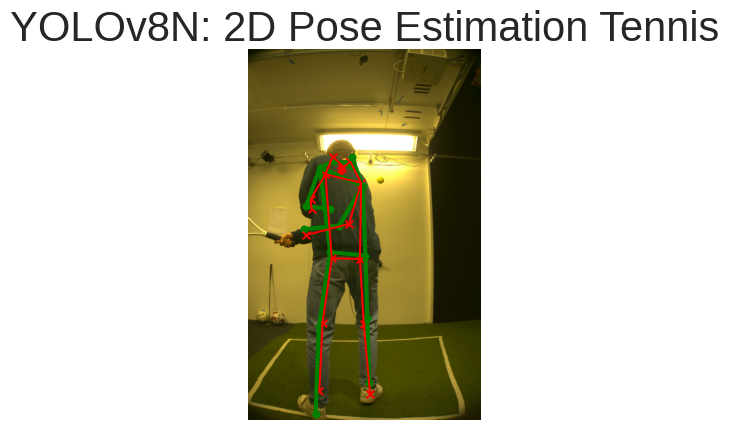

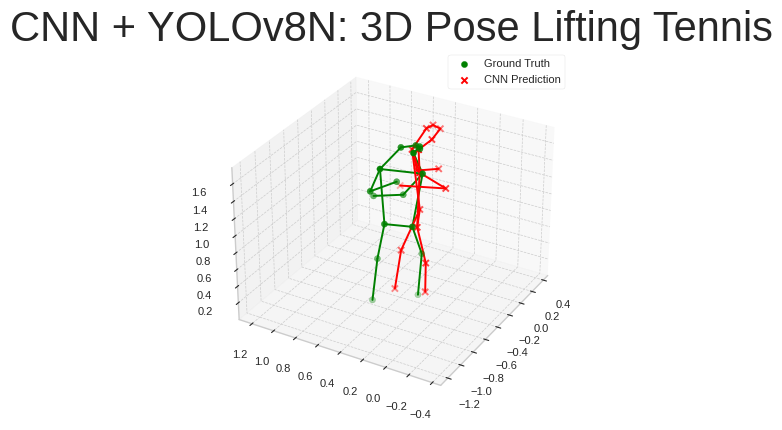


0: 640x416 1 person, 1365.4ms
Speed: 2.7ms preprocess, 1365.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 416)


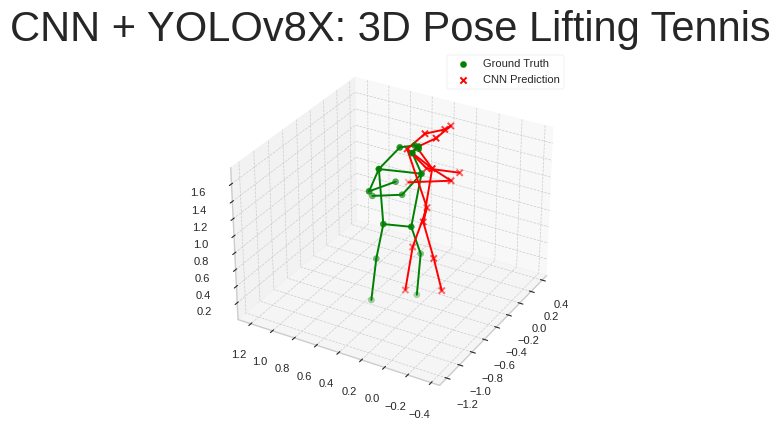

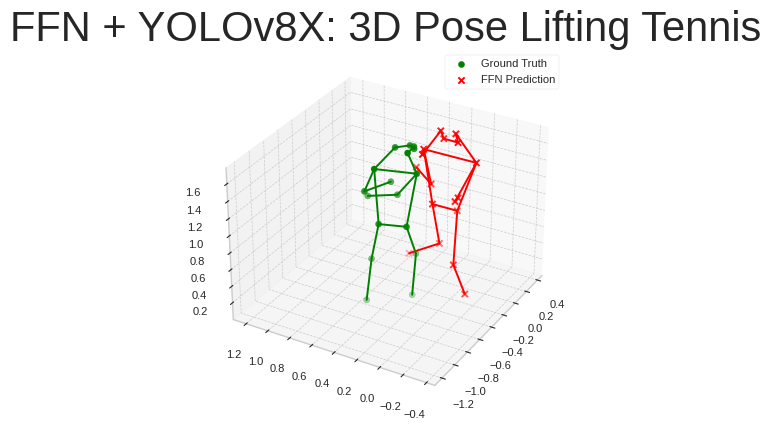

In [20]:
# Tennis

# Get sample
activity = "tennis"
ds = SportsPoseDataset(
    data_dir="../dataset/sportspose",
    sample_level="video",
    whitelist = {"metadata": {"activity": activity}},
    sample_method = sample_fn
)
sample = next(iter(ds))
frame = sample["video"]["image"]["right"][0]
joints2D = sample["joints_2d"]["right"][0]
joints3D = sample["joints_3d"]["data_points"][0]

# yoloV8n + cnn
with torch.no_grad():
    result2D = yolov8n(frame.copy())[0].keypoints
    result3D_cnn = cnn(result2D.xyn.clone()).detach().numpy()[0]
    result3D_ffn = ffn(result2D.xyn.clone()).detach().numpy()[0].reshape((17, 3))
plot_2d_skeleton(joints2D.copy(), result2D, activity, "n")
plot_3d_skeleton(joints3D.copy(), result3D_cnn, activity, "cnn", "n")
plot_3d_skeleton(joints3D.copy(), result3D_ffn, activity, "ffn", "n")

with torch.no_grad():
    result2D = yolov8x(frame.copy())[0].keypoints
    result3D_cnn = cnn(result2D.xyn.clone()).detach().numpy()[0]
    result3D_ffn = ffn(result2D.xyn.clone()).detach().numpy()[0].reshape((17, 3))
plot_2d_skeleton(joints2D.copy(), result2D, activity, "x")
plot_3d_skeleton(joints3D.copy(), result3D_cnn, activity, "cnn", "x")
plot_3d_skeleton(joints3D.copy(), result3D_ffn, activity, "ffn", "x")


In [22]:
import cv2
import glob

images = glob.glob("../plots_new/yolov8n/*2D Pose*.png")
images = list(map(lambda x: cv2.imread(x), images))
img_h = cv2.hconcat(images)
cv2.imwrite("../plots_new/yolov8n/YOLOv8N: 2D Pose Estimation.png", img_h)


True

In [24]:
import cv2
import glob

images = glob.glob("../plots_new/yolov8x/*2D Pose*.png")
images = list(map(lambda x: cv2.imread(x), images))
img_h = cv2.hconcat(images)
cv2.imwrite("../plots_new/yolov8x/YOLOv8X: 2D Pose Estimation.png", img_h)


True

In [28]:
import numpy as np
import PIL
from PIL import Image

imgs = list(filter(lambda x: "All" not in x, glob.glob("../plots_new/lifting/*CNN + YOLOv8N*.png")))

imgs = list(filter(lambda x: "All" not in x, glob.glob("../plots_new/lifting/*CNN + YOLOv8N*.png")))
imgs    = [ Image.open(i) for i in imgs ]
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack([i.resize(min_shape) for i in imgs])
imgs_comb = Image.fromarray( imgs_comb)
imgs_comb.save("../plots_new/lifting/CNN + YOLOv8N: All.png")

imgs = list(filter(lambda x: "All" not in x, glob.glob("../plots_new/lifting/*CNN + YOLOv8X*.png")))
imgs    = [ Image.open(i) for i in imgs ]
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack([i.resize(min_shape) for i in imgs])
imgs_comb = Image.fromarray( imgs_comb)
imgs_comb.save("../plots_new/lifting/CNN + YOLOv8X: All.png")

imgs = list(filter(lambda x: "All" not in x, glob.glob("../plots_new/lifting/*FFN + YOLOv8N*.png")))
imgs    = [ Image.open(i) for i in imgs ]
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack([i.resize(min_shape) for i in imgs])
imgs_comb = Image.fromarray( imgs_comb)
imgs_comb.save("../plots_new/lifting/FFN + YOLOv8N: All.png")

imgs = list(filter(lambda x: "All" not in x, glob.glob("../plots_new/lifting/*FFN + YOLOv8X*.png")))
imgs    = [ Image.open(i) for i in imgs ]
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack([i.resize(min_shape) for i in imgs])
imgs_comb = Image.fromarray( imgs_comb)
imgs_comb.save("../plots_new/lifting/FFN + YOLOv8X: All.png")

In [87]:
from PIL import Image

images = [Image.open(x) for x in glob.glob("../plots_new/lifting/*CNN + YOLOv8X*.png")]
widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

new_im = Image.new('RGB', (total_width, max_height))

x_offset = 0
for im in images:
  new_im.paste(im, (x_offset,0))
  x_offset += im.size[0]

new_im.save("../plots_new/lifting/CNN + YOLOv8X: All.png")


In [88]:
from PIL import Image

images = [Image.open(x) for x in glob.glob("../plots_new/lifting/*FFN + YOLOv8X*.png")]
widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

new_im = Image.new('RGB', (total_width, max_height))

x_offset = 0
for im in images:
  new_im.paste(im, (x_offset,0))
  x_offset += im.size[0]
new_im.save("../plots_new/lifting/FFN + YOLOv8X: All.png")


images = [Image.open(x) for x in glob.glob("../plots_new/lifting/*FFN + YOLOv8N*.png")]
widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

new_im = Image.new('RGB', (total_width, max_height))

x_offset = 0
for im in images:
  new_im.paste(im, (x_offset,0))
  x_offset += im.size[0]
new_im.save("../plots_new/lifting/FFN + YOLOv8N: All.png")


In [1]:

import argparse
import os.path

import PIL.Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO
import torch

from src.poselift.cnn import CNNModel, ResidualBlock
from sportspose.plot_skeleton_3d import plot_skeleton_3d


models = {
    "hpe": YOLO("../results/yolov8n/runs/pose/YOLOv8N SGD (40-50 epochs)/weights/best.pt"),
    "lift": torch.load("../results/lifting/cnn/best.pt", map_location = torch.device("cpu"))
}

In [17]:
def process_video(video_file, models):
    cap = cv2.VideoCapture(video_file)
    kps_2d = []

    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()

        if ret:
            result = models['hpe'](frame)[0]
            kps_2d.append(result.keypoints.xyn[0])
        else:
            break
    cap.release()

    kps_2d = torch.stack(kps_2d)
    kps_3d = models['lift'](kps_2d).detach().numpy()
    ref = np.load("../results/freekick_ref.np.npy")

    for i, (gt, pred) in enumerate(zip(ref, kps_3d)):
        print(i, gt.shape, pred.shape)
        fig = plt.figure(figsize=(10, 5))
        ax = fig.add_subplot(2, 1, 1, projection = '3d')

        plot_skeleton_3d(gt, ax = ax, kt_color = "green", joint_color = "green", label = "Ground Truth", marker = 'o')
        plot_skeleton_3d(pred, ax = ax, kt_color = "red", joint_color = "red", label = "Prediction", marker = 'x')

        plt.savefig(f"../plots_new/output/frame-{i:03d}.png", dpi=100)

    return


0: 640x640 1 person, 125.9ms
Speed: 2.8ms preprocess, 125.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 107.5ms
Speed: 3.4ms preprocess, 107.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 110.5ms
Speed: 3.3ms preprocess, 110.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 109.5ms
Speed: 2.8ms preprocess, 109.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 110.8ms
Speed: 3.4ms preprocess, 110.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 103.0ms
Speed: 2.9ms preprocess, 103.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 113.3ms
Speed: 4.8ms preprocess, 113.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 108.2ms
Speed: 3.0ms preprocess, 108.2ms inference, 1.3ms postprocess per image at

0 (17, 3) (17, 3)
1 (17, 3) (17, 3)
2 (17, 3) (17, 3)
3 (17, 3) (17, 3)
4 (17, 3) (17, 3)
5 (17, 3) (17, 3)
6 (17, 3) (17, 3)
7 (17, 3) (17, 3)
8 (17, 3) (17, 3)
9 (17, 3) (17, 3)
10 (17, 3) (17, 3)
11 (17, 3) (17, 3)
12 (17, 3) (17, 3)
13 (17, 3) (17, 3)
14 (17, 3) (17, 3)
15 (17, 3) (17, 3)
16 (17, 3) (17, 3)
17 (17, 3) (17, 3)
18 (17, 3) (17, 3)
19 (17, 3) (17, 3)
20 (17, 3) (17, 3)
21 (17, 3) (17, 3)


/tmp/ipykernel_39093/121874503.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(10, 5))


22 (17, 3) (17, 3)
23 (17, 3) (17, 3)
24 (17, 3) (17, 3)
25 (17, 3) (17, 3)
26 (17, 3) (17, 3)
27 (17, 3) (17, 3)
28 (17, 3) (17, 3)
29 (17, 3) (17, 3)
30 (17, 3) (17, 3)
31 (17, 3) (17, 3)
32 (17, 3) (17, 3)
33 (17, 3) (17, 3)
34 (17, 3) (17, 3)
35 (17, 3) (17, 3)
36 (17, 3) (17, 3)
37 (17, 3) (17, 3)
38 (17, 3) (17, 3)
39 (17, 3) (17, 3)
40 (17, 3) (17, 3)
41 (17, 3) (17, 3)
42 (17, 3) (17, 3)
43 (17, 3) (17, 3)
44 (17, 3) (17, 3)
45 (17, 3) (17, 3)
46 (17, 3) (17, 3)
47 (17, 3) (17, 3)
48 (17, 3) (17, 3)
49 (17, 3) (17, 3)
50 (17, 3) (17, 3)
51 (17, 3) (17, 3)
52 (17, 3) (17, 3)
53 (17, 3) (17, 3)
54 (17, 3) (17, 3)
55 (17, 3) (17, 3)
56 (17, 3) (17, 3)
57 (17, 3) (17, 3)
58 (17, 3) (17, 3)
59 (17, 3) (17, 3)
60 (17, 3) (17, 3)
61 (17, 3) (17, 3)
62 (17, 3) (17, 3)
63 (17, 3) (17, 3)
64 (17, 3) (17, 3)
65 (17, 3) (17, 3)
66 (17, 3) (17, 3)
67 (17, 3) (17, 3)
68 (17, 3) (17, 3)
69 (17, 3) (17, 3)
70 (17, 3) (17, 3)
71 (17, 3) (17, 3)
72 (17, 3) (17, 3)
73 (17, 3) (17, 3)
74 (17, 3) (

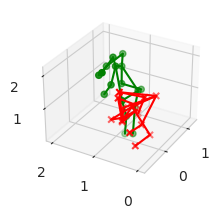

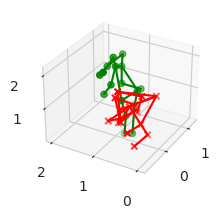

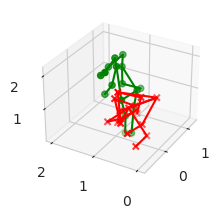

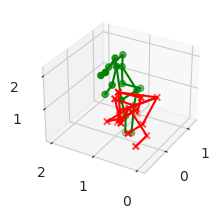

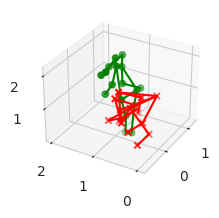

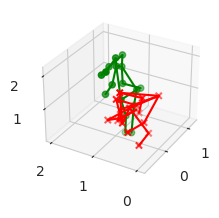

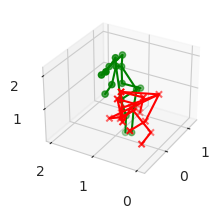

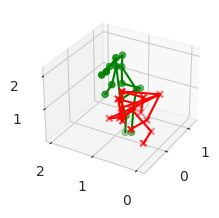

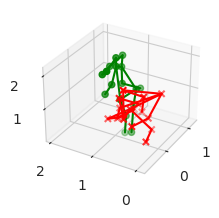

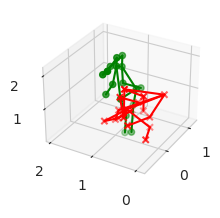

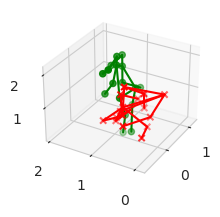

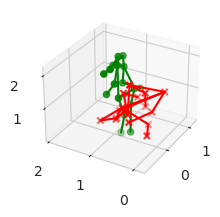

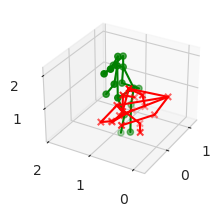

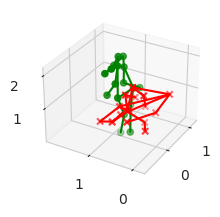

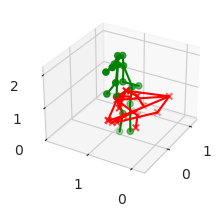

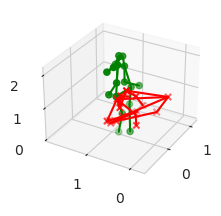

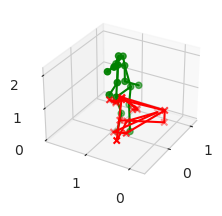

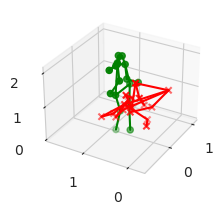

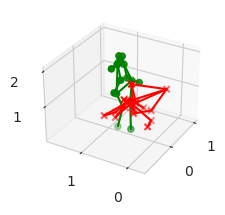

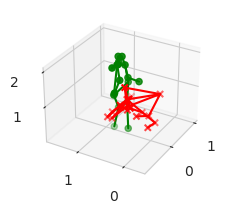

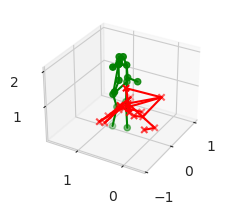

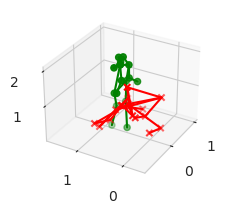

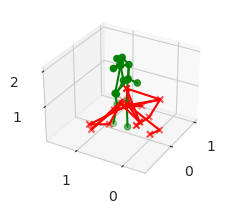

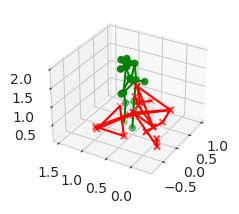

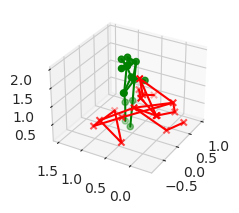

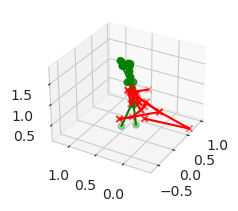

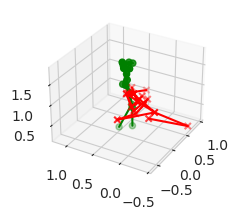

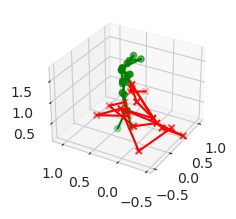

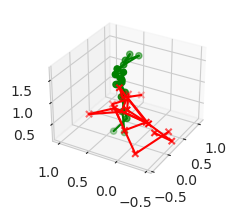

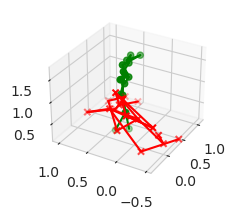

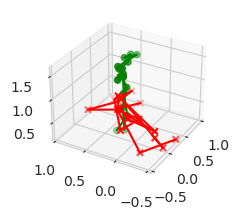

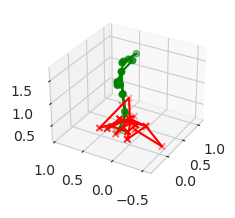

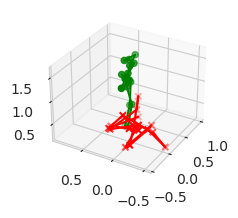

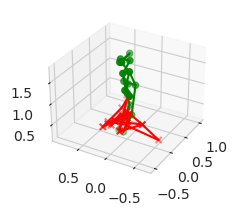

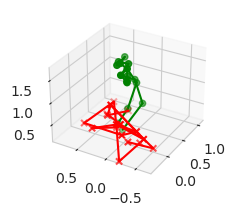

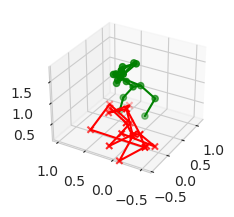

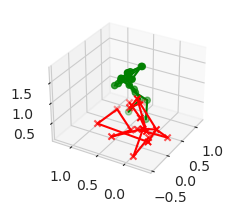

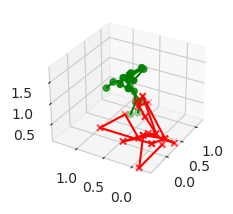

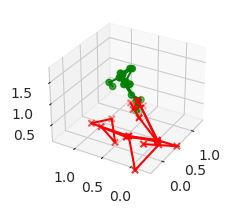

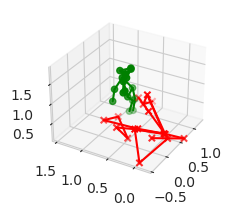

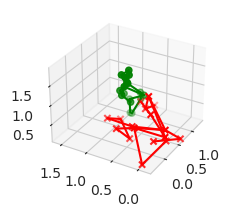

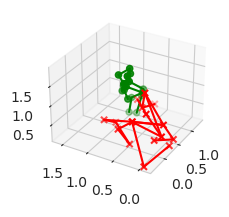

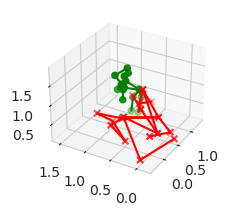

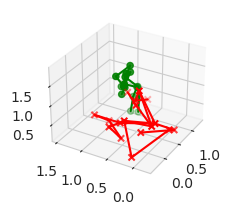

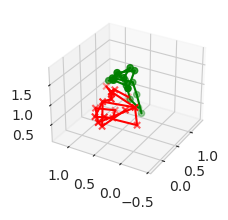

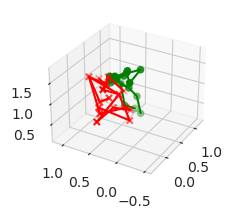

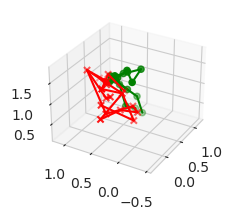

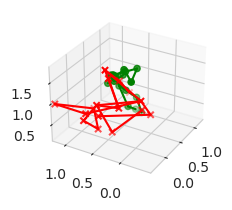

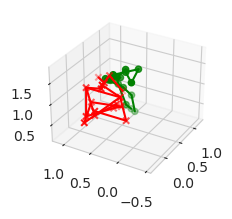

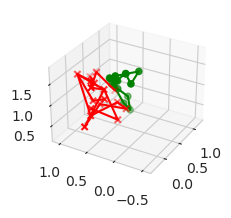

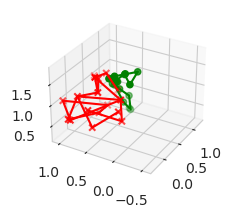

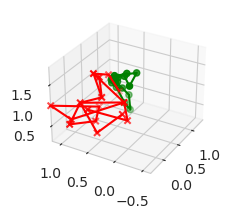

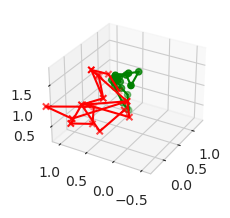

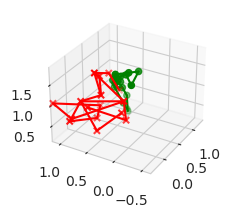

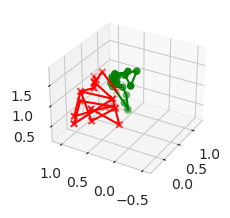

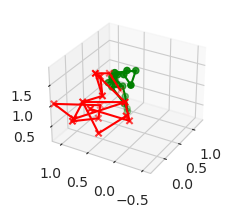

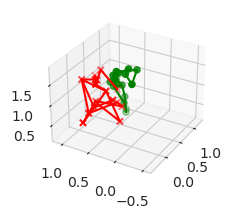

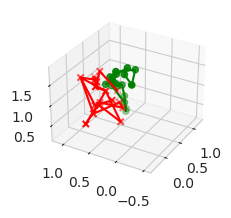

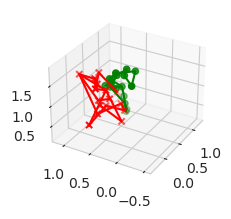

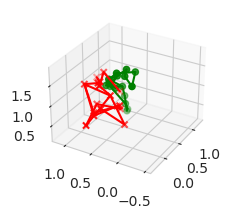

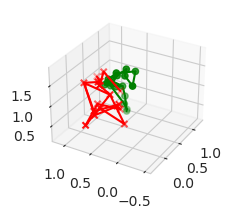

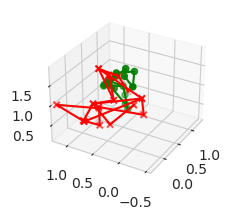

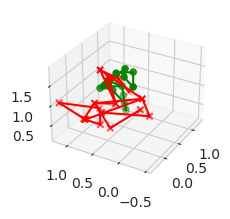

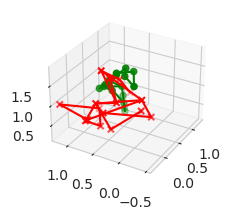

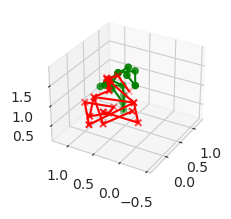

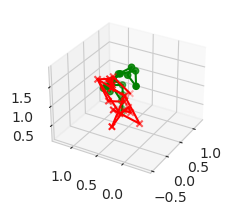

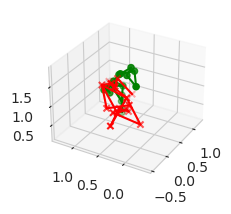

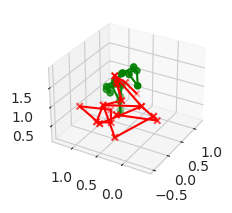

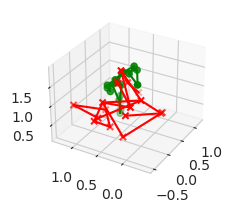

In [18]:
video_path = "../13_freekick2 (1).mp4"
process_video(video_path, models)
